**Determination of optimal biomarker for the description of stochastic disease dynamics from longitudinal data**


**Background** - Biomarkers are essentially biological entities present in the system, whose quantity detrmines a disease state. For example, PSA (Prostate Specific Antigen) is a biomarker for prostate cancer. Biomarker quantification can also indicate disease progression and recovery after treatment/transplants. Here, [https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003685], researchers have used Optimal Reaction Coordinate as a Biomarker for the Dynamics of Recovery from Kidney Transplant. The rationale behind this stems from the need for a real time, clinically measurable parameter (like biomarker) for accurate disease diagnosis and interventions at the right time. 

Organ transplantation is a complex case where the evolution of the post-transplant clinical condition monitring is highly required. The graft can either be accepted by the body or rejected and this is directly linked with the levels of (the specific) biomarker, which can be measured. NMR spectra of the blood can be used to monitor the same at different time points. The researchers have shown that this is possible in real time if the dynamics of the process is considered explicitly: the biomarkers can be determined as an optimal reaction coordinate that provides a quantitatively accurate description of the stochastic dynamics of disease progression and recovery. 

Assume that the stochastic disease dynamics can be described by a MArkov Chain. When a disease is in a particlar state (i) at a given time (t), it has the probability PΔt(j|i) to go to another state (j) at time t+Δt. This transition probability can help us understand disease trajectories from the current state to compute the probability to end up healthy or not. 

One way of understanding this transition is by projecting our multi-dimensional data (NMR spectra data) on to the Committor function. Let's consider a Markov Chain model and define boundaries, corresponding to perfectly ill and extremely ill patients. The committor function for state  i, q(i), equals the probability to end up in healthy state rather than in ill state starting from the current state. It is, literally, the likelihood of positive outcome, the most important information one would like to know about the prognosis of the patient dynamics. This is a supervised approach, however an unsupervised approach can also be take. This way, we can projecting the stochastic dynamics on the eigenvectors of the transition matrix.

I have used the data from this project and carried out a simple analysis. All credits to the authors! This is a replication analysis and not my own work!!



**Analysis**

In [23]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


Import the data and evaluate

In [24]:
import pandas as pd
data=pd.read_csv('dataset.csv')
data.head()

,ppm,k1 pre,k1 int,k1 post,k1 01,k1 03,k1 04,k1 07,k2 pre,k2 int,...,k18 05,k21 pre,k21 int,k21 post,k21 02,k21 03,k21 04,k21 05,k21 07,k21 08
0,10.4999,5.217840e-08,0.000009,-6.274910e-07,-8.382380e-08,-1.310860e-06,3.274340e-08,-8.318260e-07,1.154090e-06,-7.078790e-07,...,-0.000003,2.844570e-07,-7.903470e-07,-5.155640e-07,-5.255280e-07,-7.327550e-07,-0.000002,-1.113660e-06,1.174740e-06,0.000002
1,10.4995,2.574320e-07,0.000007,-4.539680e-07,1.883730e-07,-6.331420e-07,5.680060e-08,-9.076000e-07,8.748820e-07,-7.918940e-07,...,0.000001,2.303290e-07,-7.989480e-07,-2.593420e-07,-4.928730e-07,-2.097100e-07,-0.000002,-6.237930e-07,1.469390e-06,0.000003
2,10.4992,3.489530e-07,0.000005,-2.959010e-07,2.704110e-07,1.589890e-07,2.989720e-09,-1.695870e-06,4.780340e-07,1.945370e-07,...,0.000008,2.078120e-07,-8.657960e-07,-8.537330e-08,-3.562950e-07,4.918420e-08,-0.000002,2.433160e-07,1.333090e-06,0.000003
3,10.4988,1.461940e-07,0.000004,-1.880270e-07,3.536600e-07,3.714220e-07,-3.708800e-07,-2.654560e-06,3.196960e-07,1.124050e-06,...,-0.000004,3.557810e-07,-8.195550e-07,-1.342200e-07,-1.734780e-07,-2.340620e-07,-0.000002,4.970060e-07,8.953030e-07,0.000003
4,10.4984,-2.454430e-07,0.000005,-1.052950e-07,6.888490e-07,8.726650e-08,-1.084800e-06,-2.479230e-06,5.640190e-07,1.076260e-06,...,-0.000034,5.772960e-07,-6.709840e-07,-3.204220e-07,-2.075120e-08,-7.973380e-07,-0.000002,7.286640e-08,2.960120e-07,0.000002


In [25]:
data.shape

(31427, 141)

In [26]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Visualize the spectra for patient k1. 

<Axes: xlabel='ppm'>

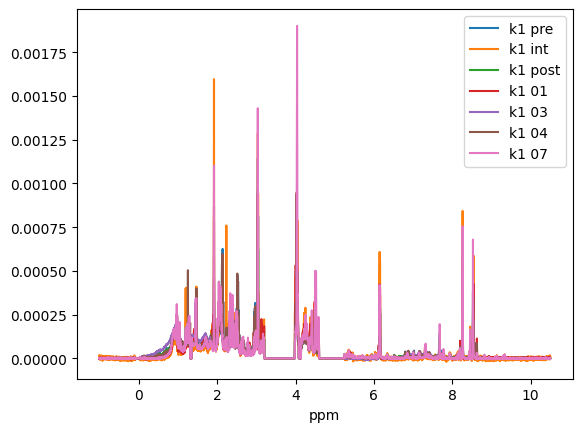

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
ax=plt.gca()
data.plot(x='ppm',y='k1 pre',ax=ax)
data.plot(x='ppm',y='k1 int',ax=ax)
data.plot(x='ppm',y='k1 post',ax=ax)
data.plot(x='ppm',y='k1 01',ax=ax)
data.plot(x='ppm',y='k1 03',ax=ax)
data.plot(x='ppm',y='k1 04',ax=ax)
data.plot(x='ppm',y='k1 07',ax=ax)

Coarsegraning the data

It is important to coarse-grain the data as there are too many variables, which would lead to over fitting. The following will truncate the data to the segment ppm min=0 and ppm max=8.0 and bin it with interval dppm=0.32.

In [28]:
def cleanup(data): #modified to work with pandas 0.24.2
    for c in data.columns[1:]:  # remove pre and post and convert int to 0
        pat,time=c.split()
        if time=='pre' or time=='post':data.drop(columns=c,inplace=True)
        if time=='int':data.rename(columns={c:pat+' 0'},inplace=True)
    data.set_index('ppm',inplace=True) # move ppm column to index
    multi={} # create multiIndex: first index - patient, second index - time
    for c in data.columns:
        pat,time=c.split()
        time=float(time)
        multi[c]=pat,time
    data.rename(columns=multi,inplace=True)
    mi=pd.MultiIndex.from_tuples(data.columns)
    data=data.reindex(columns=mi)
    data.columns.names=['patient','time']
    return data
            
def coarsegrain(data,ppmmin,ppmmax,dppm):
    import numpy
    bins=numpy.arange(ppmmin,ppmmax+dppm+1e-5,dppm)
    cdata=data.groupby(pd.cut(data.index, bins=bins)).sum()
    cdata.index.names=['ppm']
    return cdata

data=cleanup(data)
cdata=coarsegrain(data,ppmmin=0,ppmmax=8.0,dppm=0.32)

C:\Users\Harshitha\AppData\Local\Temp\ipykernel_25224\3053088275.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cdata=data.groupby(pd.cut(data.index, bins=bins)).sum()


Understand the coarsegrained data (cdata)

In [31]:
cdata['k1']

time,0.0,1.0,3.0,4.0,7.0
ppm,,,,,
"(0.0, 0.32]",-0.001583,-0.000281,0.009000,0.004419,-0.000220
"(0.32, 0.64]",0.000136,0.002862,0.032484,0.012266,0.000749
"(0.64, 0.96]",0.038482,0.055406,0.101285,0.065217,0.059553
"(0.96, 1.28]",0.067235,0.055209,0.098007,0.081463,0.080118
"(1.28, 1.6]",0.059342,0.074455,0.092855,0.070258,0.068011
"(1.6, 1.92]",0.092793,0.097131,0.101798,0.083670,0.075179
"(1.92, 2.24]",0.123715,0.117918,0.120938,0.142074,0.126483
"(2.24, 2.56]",0.121508,0.109162,0.087738,0.112418,0.105153
"(2.56, 2.88]",0.038310,0.038332,0.038933,0.035202,0.033811


The coarsegrained spectra for patient K1. 

<Axes: xlabel='ppm'>

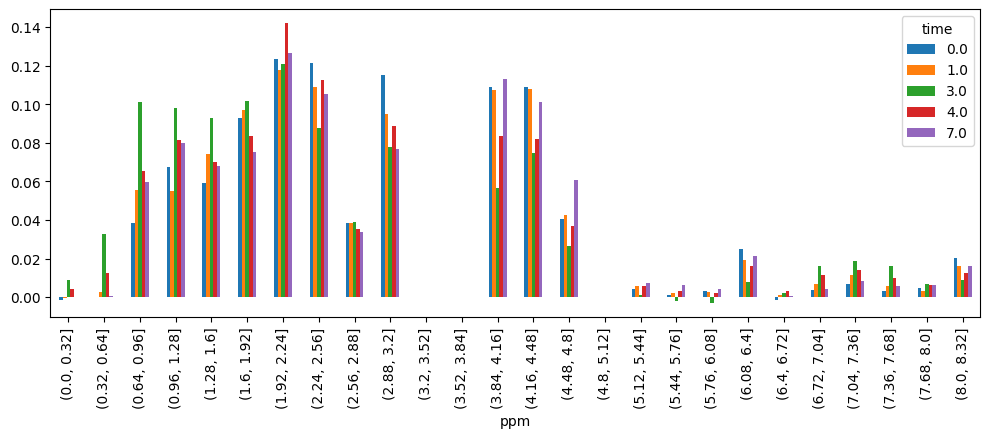

In [32]:
cdata['k1'].plot.bar(figsize=(12,4))

Here, we can start determining the commitor function. It is important to determine the boundaries for the same and in our case they are - AR - Acute Rejection, DGF - Delayed Graft Function, PF - Perfect Function. 

But I have taken a different approach by considering the coarsegrained data as a transition matrix and projecting eigen vectors (as each row of the matrix corresponds to one biomarker spectra value, and each column corresponds to the next value it has reached). The elements of the matrix represent the probabilities of transitioning between states.

**I aim to show that this approach can be used to atleast seperate the numerous states, establishing a clear pattern.** This would be greatly useful in real time in understanding different end states that the diseases could lead to. With this data, a simple blood test for a biomarker can help us understand what is happending and sometimes even extrapolate and predict what could happen, so clinicians can take faster steps. 

Calculate eigen-vectors by defining the eigen vectors. 

In [33]:
import numpy as np

def evecs(cdata, labels, skip, lmb=0):
    """
    Perform unsupervised analysis and compute eigenvectors of the transition matrix.

    Parameters:
    - data: array-like, shape (n_samples, n_features)
      Data matrix where each row represents a sample and each column a feature.

    - labels: array-like, shape (n_samples,)
      Labels or indices indicating the group of each sample.

    - skip: array-like, shape (n_samples,)
      Indices of samples to skip in the analysis.

    - lmb: float, optional (default=0)
      Regularization parameter.

    Returns:
    - eigenvectors: array, shape (n_samples, n_samples)
      Eigenvectors of the transition matrix.

    - info: dictionary
      Additional information about the analysis.
    """

    # For the sake of example, let's use a placeholder for eigenvectors
    eigenvectors = np.random.rand(data.shape[0], data.shape[0])

    # Additional information (placeholder)
    info = {'method': 'unsupervised_analysis', 'parameters': {'lmb': lmb}}

    return eigenvectors, info



Defines a function p2evecs that takes a pandas DataFrame, generates placeholder data for labels and skip parameters, performs eigenvector decomposition using a hypothetical function evecs, and returns the resulting eigenvector data in a formatted DataFrame along with the number of time points.

In [34]:
def p2evecs(data, lmb=0):
    import pandas as pd
    import numpy as np

    # Assuming evecs is the function defined above
    # Placeholder for labels and skip 
    labels = np.random.choice([0, 1], size=data.shape[0])
    skip = np.random.choice([0, 1], size=data.shape[0])

    evs, info = evecs(data.to_numpy(), labels, skip, lmb=lmb)

    d = {}
    for it in range(data.shape[1]):
        c = data.columns[it]
        d[c] = [evs[ix, it] for ix in range(data.shape[0])]

    evdata = pd.DataFrame(d)
    evdata.columns.names = ['patient', 'time']
    evdata.index.names = ['evecs']

    return evdata, data.shape[1]

evdata, nt = p2evecs(cdata)

Evaluate the evdata

In [35]:
evdata

patient        k1                                                k2            \
time          0.0       1.0       3.0       4.0       7.0       0.0       1.0   
evecs                                                                           
0        0.345428  0.862833  0.764368  0.035091  0.540073  0.731965  0.183470   
1        0.558717  0.666610  0.829756  0.088360  0.482998  0.109277  0.351668   
2        0.699357  0.217021  0.168892  0.980055  0.956160  0.883234  0.486659   
3        0.654641  0.099435  0.773517  0.108988  0.270760  0.622171  0.665772   
4        0.621269  0.431999  0.455132  0.692287  0.525091  0.885283  0.240899   
5        0.799449  0.628331  0.111308  0.438914  0.421612  0.379260  0.254496   
6        0.944126  0.631281  0.389964  0.919976  0.365700  0.408170  0.529027   
7        0.492336  0.995363  0.856411  0.047459  0.548538  0.435272  0.142674   
8        0.762602  0.475035  0.464643  0.554453  0.801333  0.463503  0.665971   
9        0.260664  0.767885  0.747492  0.475997  0.662111  0.538695  0.164856   
10       0.266643  0.914123  0.505829  0.322988  0.063915  0.311767  0.291195   
11       0.667335  0.913130  0.189138  0.591590  0.269665  0.985739  0.954963   
12       0.375615  0.612847  0.578942  0.909124  0.092427  0.440645  0.668815   
13       0.766791  0.945598  0.016131  0.749082  0.246114  0.952482  0.004837   
14       0.431140  0.956891  0.220100  0.254526  0.613445  0.410244  0.865612   
15       0.240299  0.858616  0.139780  0.320656  0.987178  0.286882  0.298175   
16       0.844272  0.640359  0.850816  0.310482  0.936234  0.486119  0.952162   
17       0.261743  0.172143  0.136734  0.884658  0.940115  0.760526  0.379179   
18       0.308235  0.982972  0.419559  0.149793  0.564014  0.498601  0.336910   
19       0.475513  0.530614  0.407562  0.944137  0.993775  0.693708  0.977350   
20       0.380530  0.091963  0.245161  0.371190  0.498333  0.998136  0.237123   
21       0.255824  0.949767  0.166794  0.483372  0.373125  0.664321  0.488275   
22       0.268744  0.579266  0.170432  0.603697  0.622396  0.614412  0.612958   
23       0.967693  0.908563  0.754809  0.912274  0.642943  0.350857  0.452679   
24       0.420641  0.232728  0.381738  0.282104  0.829417  0.462932  0.160349   
25       0.499623  0.924689  0.550382  0.404617  0.836041  0.645458  0.288922   

patient                                ...       k18                      \
time          2.0       4.0       7.0  ...       2.0       3.0       5.0   
evecs                                  ...                                 
0        0.444439  0.895364  0.257166  ...  0.995626  0.619790  0.344011   
1        0.426618  0.820601  0.588386  ...  0.806999  0.116950  0.113941   
2        0.239379  0.273240  0.343477  ...  0.754216  0.667805  0.900997   
3        0.775086  0.897331  0.230228  ...  0.210945  0.959662  0.532134   
4        0.395508  0.343469  0.233371  ...  0.735470  0.722369  0.738399   
5        0.246408  0.948349  0.678153  ...  0.710708  0.693718  0.633230   
6        0.508952  0.116950  0.365533  ...  0.959523  0.228207  0.092300   
7        0.338713  0.572366  0.247494  ...  0.463064  0.811912  0.949298   
8        0.281475  0.265401  0.806003  ...  0.025047  0.866612  0.449331   
9        0.746313  0.251032  0.095239  ...  0.562984  0.651491  0.222748   
10       0.608203  0.975492  0.947165  ...  0.102328  0.049902  0.991961   
11       0.902195  0.373363  0.796040  ...  0.658325  0.695536  0.238730   
12       0.895782  0.269632  0.955364  ...  0.483022  0.175432  0.309503   
13       0.896867  0.714561  0.602549  ...  0.598136  0.432394  0.066653   
14       0.268305  0.814361  0.984874  ...  0.470474  0.194027  0.120972   
15       0.815878  0.683321  0.229532  ...  0.285608  0.190888  0.895334   
16       0.365376  0.751738  0.199829  ...  0.791505  0.991840  0.513350   
17       0.182856  0.998723  0.579969  ...  0.249712  0.201387  0.044747   
18       0.922170  0.483788  0.909420  ...  0.872206  

Visualize the patient trajectory on the first eigen vector. 

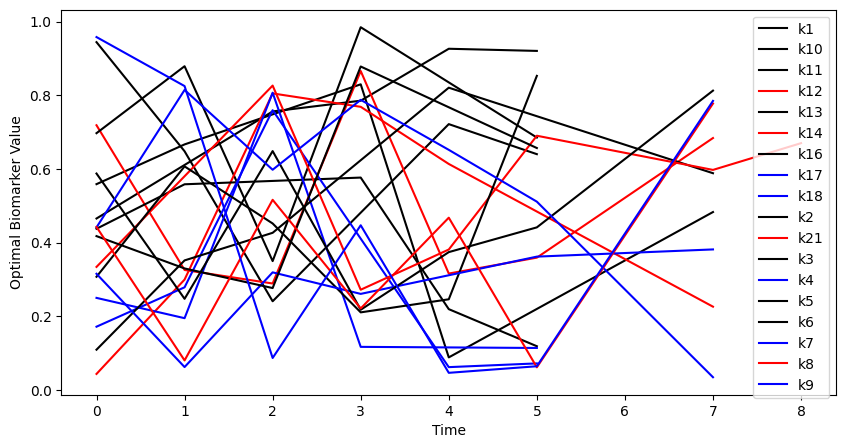

In [40]:
import matplotlib.pyplot as plt
iev = 1

AR=['k8', 'k12', 'k14', 'k21', 'k27']
DGF=['k4', 'k7', 'k9', 'k15', 'k17', 'k18', 'k24']
PF=['k1', 'k2', 'k3', 'k5', 'k6', 'k10', 'k11', 'k13', 'k16', 'k25', 'k26', 'k33', 'k34']

fig, ax = plt.subplots(figsize=(10, 5))
colors = {'AR': 'red', 'DGF': 'blue', 'PF': 'black'}

for pat in evdata.columns.levels[0]:
    group = 'AR' if pat in AR else ('DGF' if pat in DGF else 'PF')
    ax.plot(evdata[pat].T.index, evdata[pat].T[iev], label=pat, color=colors[group])
ax.set_xlabel('Time')
ax.set_ylabel('Optimal Biomarker Value')  
ax.legend(loc='upper right')

plt.show()

As you can see, the results are a complete mess. 

**The data is supposed to be high-throughput containing important values, but maybe due to the large number of variables there is a strong likelihood this is a classic case of overfitting. Hence feature selection is important as the next step. **




KeyError: 'k25'

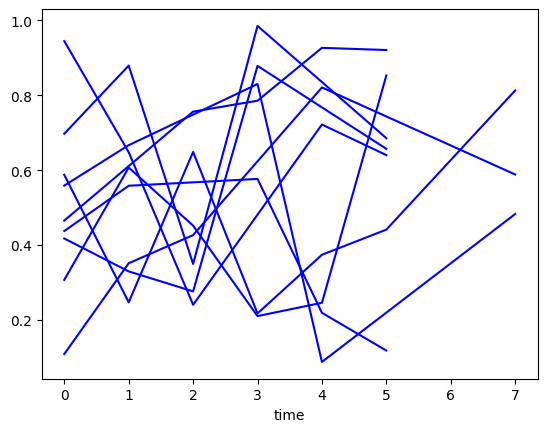

In [41]:
import matplotlib.pyplot as plt

iev = 1
ax = plt.gca()

# Only visualize trajectories associated with the "AR" group
for pat in PF:
    style = 'b-'
    evdata[pat].T[iev].plot(ax=ax, legend=False, style=style)

# Add labels and legend if needed
ax.set_xlabel('Time')
ax.set_ylabel('Trajectory Value')
ax.legend(PF, loc='upper right')  # Replace with actual legend location

plt.show()
